<a href="https://colab.research.google.com/github/FabioRovai/test123/blob/main/beluu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

In this notebook, we'll look at the [COVID-19 Symptons dataset](https://www.kaggle.com/iamhungundji/covid19-symptoms-checker). You should try with **your own dataset** for the assignment!

We can then use this representation to cluster data points together, and investigate each cluster. 


In [1]:
import random, os, sys, shutil
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

Insert the path to your data 

In [32]:
#Read in csv
df = pd.read_excel("/content/Dati varianti ABCD1 (1).xlsx")

In [33]:
#See columns
df.columns

Index(['Residue / Position', 'Nucleotide', 'Variant ID', 'vf', 'Conseq. Type',
       'Source', 'Evidence', 'vf_allele', 'Alleles', 'Ambig. code', 'Residues',
       'Codons Variant Position', 'Codons / Mutation', 'sift_sort',
       'sift_class', 'SIFT', 'polyphen_sort', 'polyphen_class', 'PolyPhen',
       'cadd_sort', 'cadd_class', 'CADD', 'revel_sort', 'revel_class', 'REVEL',
       'meta_lr_sort', 'meta_lr_class', 'MetaLR', 'mutation_assessor_sort',
       'mutation_assessor_class', 'Mutation Assessor'],
      dtype='object')

In [34]:
#Summarise
df.describe()

,Residue / Position,Nucleotide,vf,Codons Variant Position,sift_sort,SIFT,polyphen_sort,PolyPhen,cadd_sort,CADD,revel_sort,REVEL,meta_lr_sort,MetaLR,mutation_assessor_sort,Mutation Assessor
count,1680.000000,1680.000000,1.680000e+03,797.000000,508.000000,508.000000,508.000000,508.000000,506.000000,506.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,369.235119,1105.671429,5.291591e+08,2.036386,170.862205,0.169862,526.399606,0.525400,19805.347826,19.804348,NaN,NaN,NaN,NaN,NaN,NaN
std,206.857937,620.590962,2.372602e+08,0.835717,251.478039,0.251478,435.234952,0.435235,8196.066484,8.196066,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,1.149210e+08,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,191.750000,572.750000,2.106944e+08,1.000000,1.000000,0.000000,24.000000,0.023000,16001.000000,16.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,364.000000,1092.000000,7.233565e+08,2.000000,41.000000,0.040000,614.500000,0.613500,23001.000000,23.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,548.000000,1642.500000,7.233570e+08,3.000000,271.000000,0.270000,986.250000,0.985250,25001.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,746.000000,2237.000000,7.443016e+08,3.000000,1001.000000,1.000000,1001.000000,1.000000,33001.000000,33.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df=df[['Residue / Position','Nucleotide','vf','Codons Variant Position','sift_sort','SIFT','polyphen_sort','PolyPhen','cadd_sort','CADD']]

### .isna().any()

Find if there are any **NaN** values in each column. There aren't because this is a cleaned dataset!

In [36]:
df=df.dropna()
df.isna().any()

Residue / Position         False
Nucleotide                 False
vf                         False
Codons Variant Position    False
sift_sort                  False
SIFT                       False
polyphen_sort              False
PolyPhen                   False
cadd_sort                  False
CADD                       False
dtype: bool

### Correlation Matrix

A quick way to see if any of the features are **correlated** is to use the built in ```df.corr()``` function in Pandas. 

Obviously, each feature is completely correlated with itself (row of ones down the diagonal). 

The nearer a value is to ``1``, more the two features are positively correlated. 

In [37]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Residue / Position,Nucleotide,vf,Codons Variant Position,sift_sort,SIFT,polyphen_sort,PolyPhen,cadd_sort,CADD
Residue / Position,1.00,1.00,-0.05,0.01,-0.08,-0.08,0.08,0.08,0.05,0.05
Nucleotide,1.00,1.00,-0.05,0.01,-0.08,-0.08,0.08,0.08,0.05,0.05
vf,-0.05,-0.05,1.00,0.06,0.01,0.01,-0.03,-0.03,0.02,0.02
Codons Variant Position,0.01,0.01,0.06,1.00,0.03,0.03,-0.10,-0.10,-0.08,-0.08
sift_sort,-0.08,-0.08,0.01,0.03,1.00,1.00,-0.66,-0.66,-0.65,-0.65
SIFT,-0.08,-0.08,0.01,0.03,1.00,1.00,-0.66,-0.66,-0.65,-0.65
polyphen_sort,0.08,0.08,-0.03,-0.10,-0.66,-0.66,1.00,1.00,0.76,0.76
PolyPhen,0.08,0.08,-0.03,-0.10,-0.66,-0.66,1.00,1.00,0.76,0.76
cadd_sort,0.05,0.05,0.02,-0.08,-0.65,-0.65,0.76,0.76,1.00,1.00
CADD,0.05,0.05,0.02,-0.08,-0.65,-0.65,0.76,0.76,1.00,1.00


# Clustering 

In [8]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Standardise 

First we have to standardise the range of the dataset, as PCA and K-Means are effected by scale.

In [9]:
#First we drop the country column (its not a number and not interesting for analysis)
x = df


In [10]:
#Standardise
x = StandardScaler().fit_transform(x)

### Plot in 2D

Now we can use PCA to reduce the dataset to only 2 dimensions. This means we can plot it on a 2D axis.

In [11]:
#Get reduced dimensions
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)

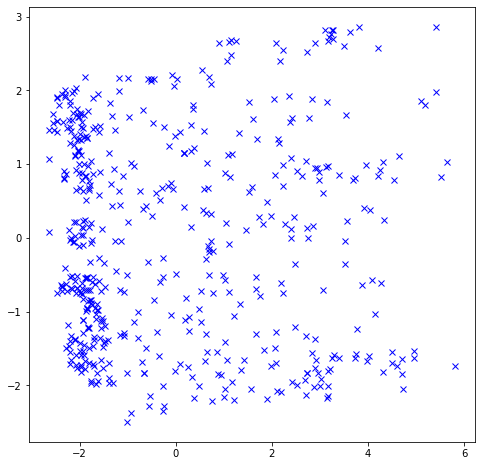

In [12]:
#Plot
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

In [13]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3)
    plot_centroids(clusterer.cluster_centers_)

### Elbow Plot

Whats the best value of **k**? We can look for the **elbow** that shows a big jump in **inertia** before a flattening off. Here we plot the first 20 values of k.

Remember, this is just a guide to help you pick a value of k and other factors may be involved in your final decision 

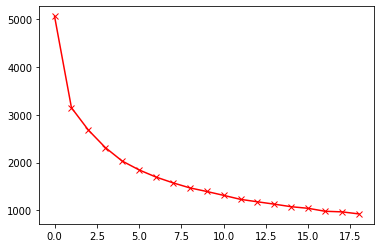

In [14]:
scores=[]
for i in range(1,20):
    #Fit for k
    means=KMeans(n_clusters=i)
    means.fit(x)
    #Get inertia
    scores.append(means.inertia_)
plt.plot(scores,"-rx")

# Cluster and Plot

First try with all the features. 

You may find that your clusters and their centres don't look right. Remember, we are clustering based on **all** of the features, and then reducing down to 2 dimensions to plot. 

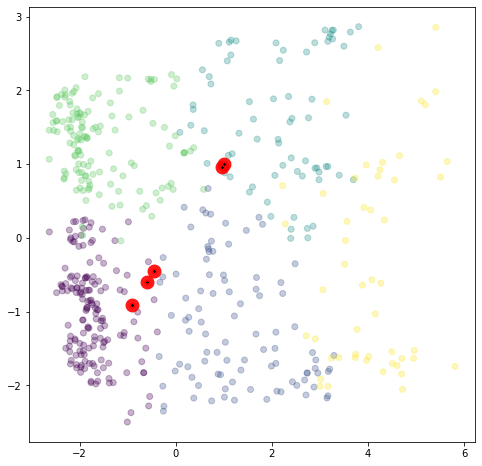

In [15]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x)
plt.figure(figsize=(8, 8))
#Plot clusters onto PCA reduced plot
plot_clusters(kmeans, x)

### Reducing Dimensions before clustering

You can also try reducing the dimensions before clustering, which may give you better results.

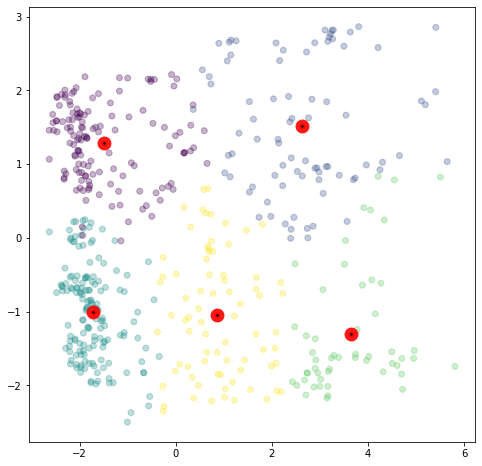

In [16]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 4 

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x)

#Fit cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results on 2D plot
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)

## Examine Clusters

Here we plot a selection of features for each cluster. Can we use this to help us characterise each cluster?

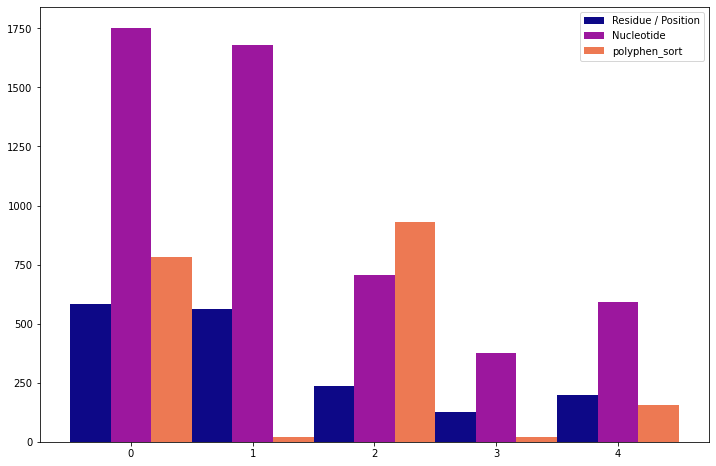

In [46]:
#Add cluster labels as extra column in dataframe
labels = kmeans.predict(x_less_dimensions)
df["cluster"] = labels

#Pick some features to plot

features = ['Residue / Position','Nucleotide','polyphen_sort']






plt.figure(figsize=(12, 8))

cmap = plt.cm.get_cmap('plasma')
#Iterate through features
for index, f in enumerate(features):
    #Get mean for each feature for each cluster
    data = [np.mean(df[df["cluster"]==i][f]) for i in range(k)]
    
    width = 1/(len(features))
    x_vals = np.arange(len(data)) + (width*index) - 0.5 + width/2
    
    #Plot this feature for each cluster
    plt.bar(x_vals, data, width = width, label = f, color = cmap(index/len(features)))
    
plt.legend()